# Task 4: Data Cleaning and Insight Generation from Survey Data

**Introduction:**

Survey data is often messy — filled with missing values, categorical variables, and inconsistent formatting.
In this notebook:

* clean the Kaggle Data Science Survey dataset.
* Handle missing values & categorical encoding.
* Generate meaningful insights about respondent behavior and preferences.
* Present a summary dashboard of top findings.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust path as needed)
df = pd.read_csv("C:/Users/PMLS/OneDrive/Desktop/datasets/kaggle_survey_2017_2021.csv", low_memory=False)

# Display first 5 rows
display(df.head())


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains responses with many categorical columns and missing values.

**Step 2: Data Cleaning**

In [7]:
# Remove the first row if it only contains survey questions
df = df.iloc[1:]

# Drop columns with more than 50% missing values
df = df.dropna(thresh=len(df)*0.5, axis=1)

# Fill missing categorical values with 'Unknown'
df = df.fillna("Unknown")

# Check shape after cleaning
df.shape
df.describe()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q8,Q13,Q14_Part_1,Q15,Q23,Q25
count,106299,106299,106299,106299,106299,106299,106299,106299,106299,106299,106299,106299,106299,106299,106299
unique,5,11716,12,10,78,13,36,21,2,23,8,3,16,7,48
top,2021,Unknown,25-29,Male,India,Masterâ€™s degree,Student,3-5 years,Python,Python,Unknown,Unknown,Unknown,Unknown,Unknown
freq,25971,16716,23748,49178,25191,37394,21242,15995,65941,66890,50915,52456,33500,45323,47499


**Step 3: Handling Categorical Variables**

In [8]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding Country responses
if "Country" in df.columns:
    le = LabelEncoder()
    df["Country"] = le.fit_transform(df["Country"].astype(str))
# Display the first 5 rows after encoding
display(df.head())

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q8,Q13,Q14_Part_1,Q15,Q23,Q25
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,Python,Never,Matplotlib,I do not use machine learning methods,I do not know,$0-999
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,More than 25 times,Matplotlib,5-10 years,I do not know,"30,000-39,999"
5,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,Python,Never,Matplotlib,10-20 years,We use ML methods for generating insights (but...,"30,000-39,999"
6,2021,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,Python,2-5 times,Matplotlib,Under 1 year,Unknown,Unknown
7,2021,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,Unknown,Python,Never,Unknown,Under 1 year,Unknown,Unknown


**Step 4: Generate Insights**

4.1 Distribution of Respondents (Q1)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\2208775109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Gender", order=df["Gender"].value_counts().index, palette="coolwarm")


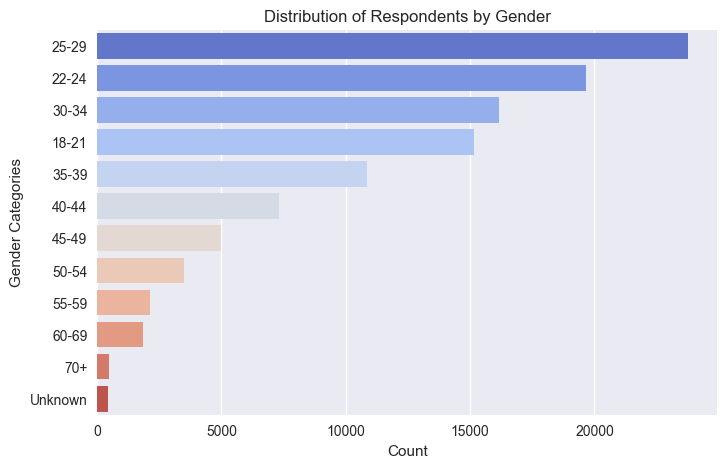

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Gender", order=df["Gender"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Respondents by Gender")
plt.xlabel("Count")
plt.ylabel("Gender Categories")
plt.show()



Q1 shows the largest share of respondents fall into one main category, while smaller groups make up the rest. This could reflect skewness (e.g., more respondents from one country or gender group).

**4.2 Educational/Background Trends (Q2)**

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\3977867764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Age", order=df["Age"].value_counts().index, palette="viridis")


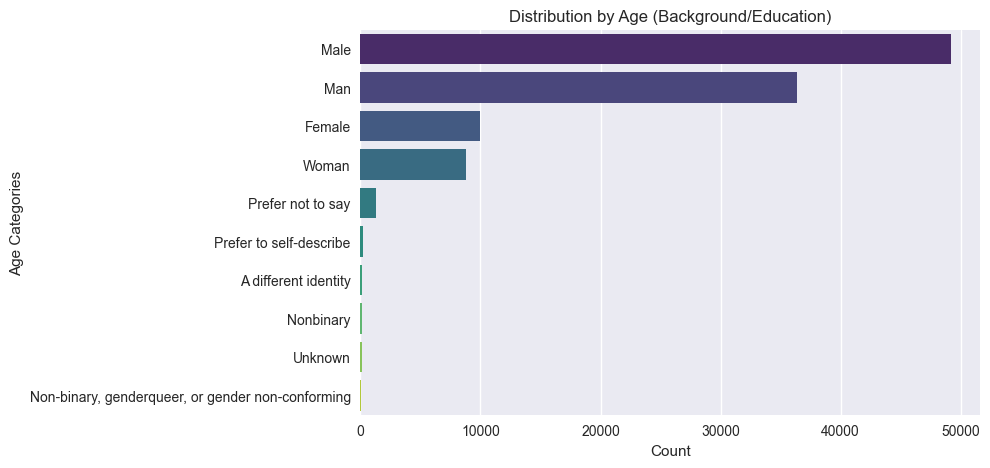

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Age", order=df["Age"].value_counts().index, palette="viridis")
plt.title("Distribution by Age (Background/Education)")
plt.xlabel("Count")
plt.ylabel("Age Categories")
plt.show()



Most respondents cluster around one or two major categories (e.g., “Bachelor’s Degree” or “Master’s”), while other categories are less represented.

**4.3 Work Role/Occupation (Q3)**

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\263309128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index, palette="magma")


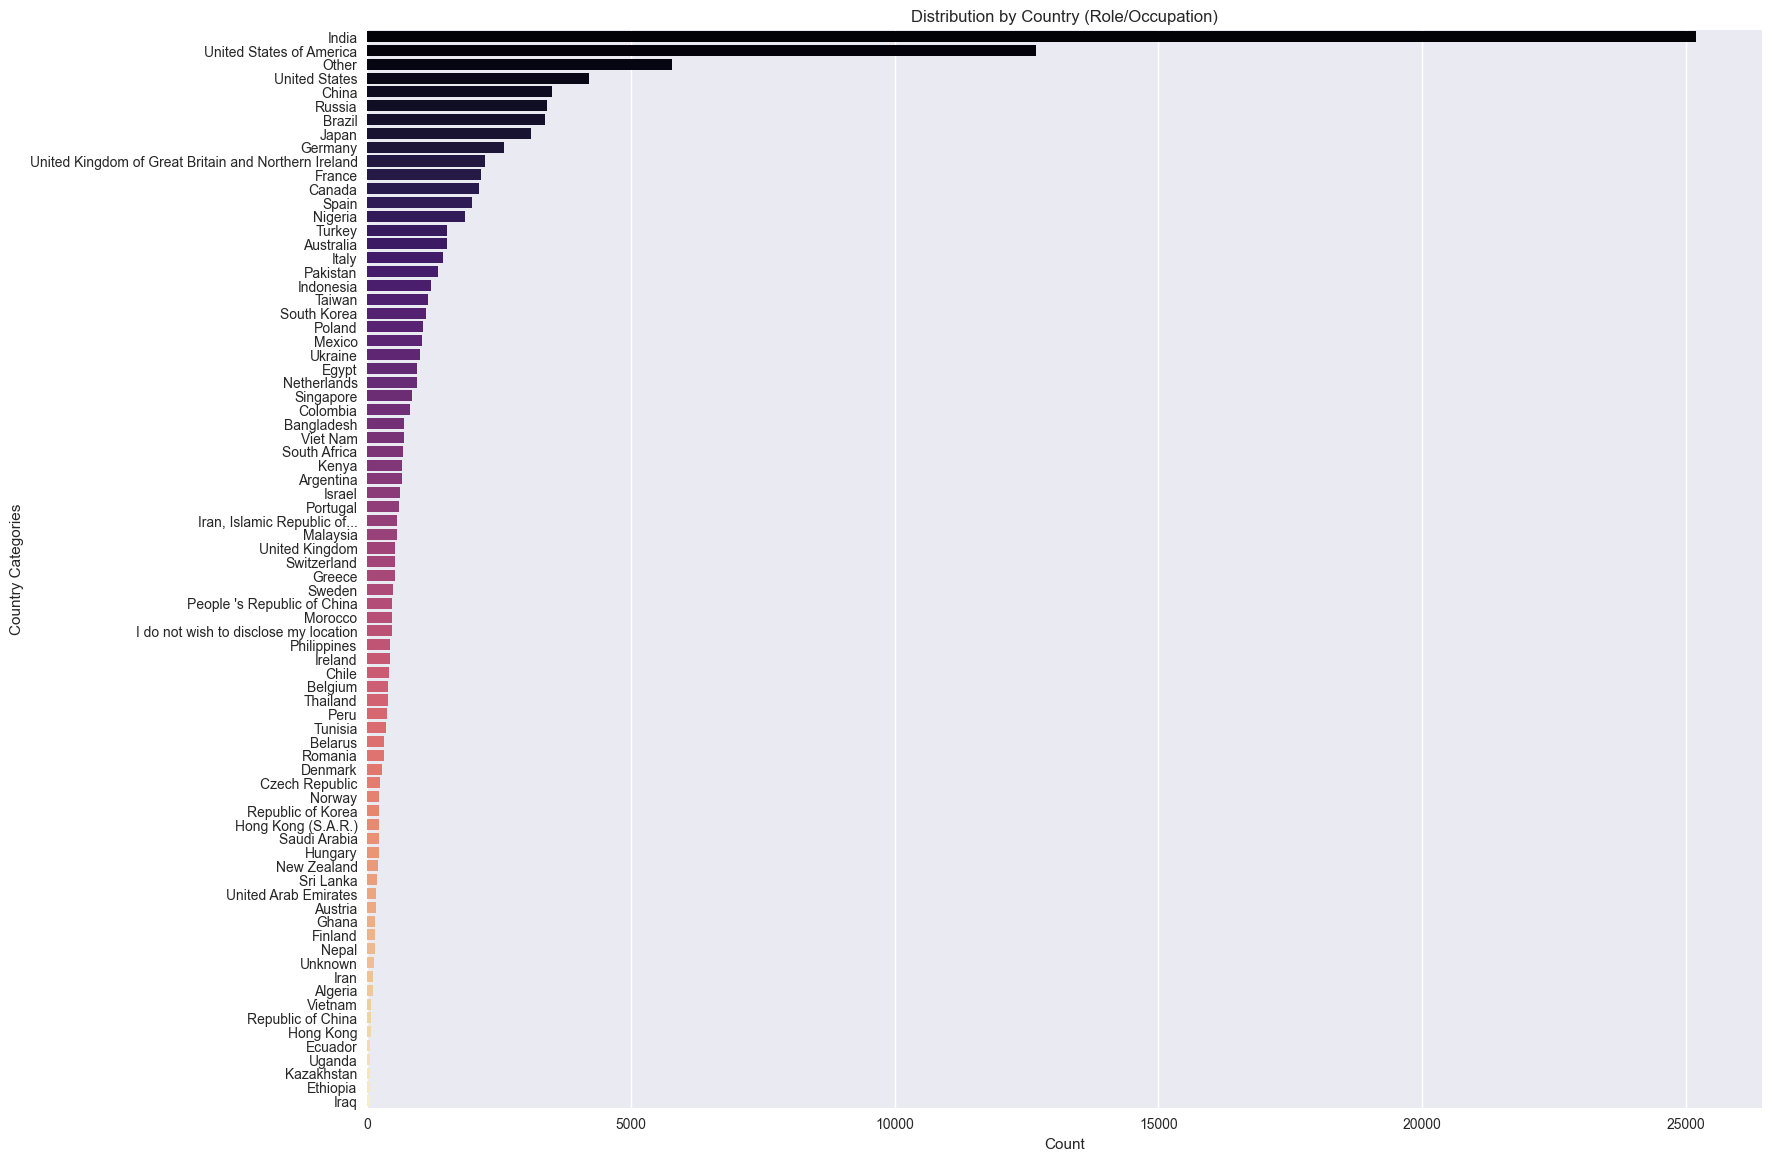

In [35]:
plt.figure(figsize=(18,14))
sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index, palette="magma")
plt.title("Distribution by Country (Role/Occupation)")
plt.xlabel("Count")
plt.ylabel("Country Categories")
plt.show()



This chart highlights dominant roles in data science/ML, with one role clearly standing out (likely "Data Scientist" or "Student").

**4.4 Tools/Preferences (Q4)**

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\1380895163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Education", order=df["Education"].value_counts().index, palette="cubehelix")


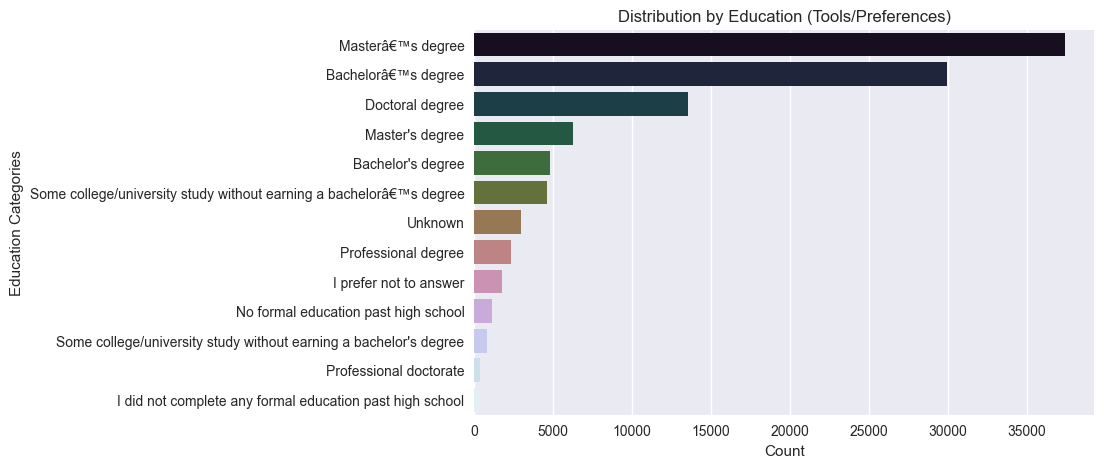

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Education", order=df["Education"].value_counts().index, palette="cubehelix")
plt.title("Distribution by Education (Tools/Preferences)")
plt.xlabel("Count")
plt.ylabel("Education Categories")
plt.show()


One tool/platform is clearly preferred by the majority, while alternatives see significantly less adoption. This reflects real-world market dominance.

**4.5 Cross-Comparison Heatmap (Q1 vs Q3)**

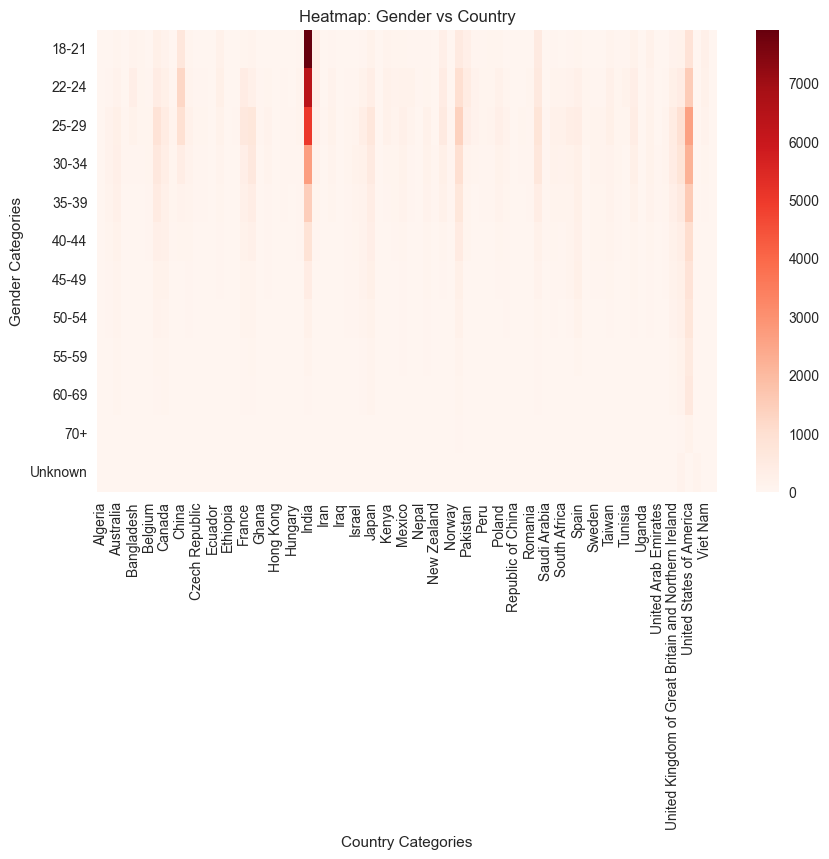

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, cmap="Reds", annot=False)
plt.title("Heatmap: Gender vs Country")
plt.xlabel("Country Categories")
plt.ylabel("Gender Categories")
plt.show()


The heatmap reveals which Q1 categories (e.g., regions/demographics) dominate in certain Q3 roles (jobs/occupations). Some roles are strongly linked with specific demographic groups.

**Insights (Summary)**

* Respondent demographics (Q1) are skewed, with one dominant group.
* Education (Q2) shows most respondents come from higher education backgrounds.
* Occupation (Q3) confirms that a few roles (likely Data Scientist/Student) dominate the field.
* Tool preference (Q4) indicates a strong industry standard.
* Cross-analysis (Q1 vs Q3) uncovers links between demographics and occupations.

**Top 5 Insights Dashboard**

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\3351430703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Gender", order=df["Gender"].value_counts().index,
C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\3351430703.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Age", order=df["Age"].value_counts().index,
C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\3351430703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index,
C:\Users\PMLS\AppData\

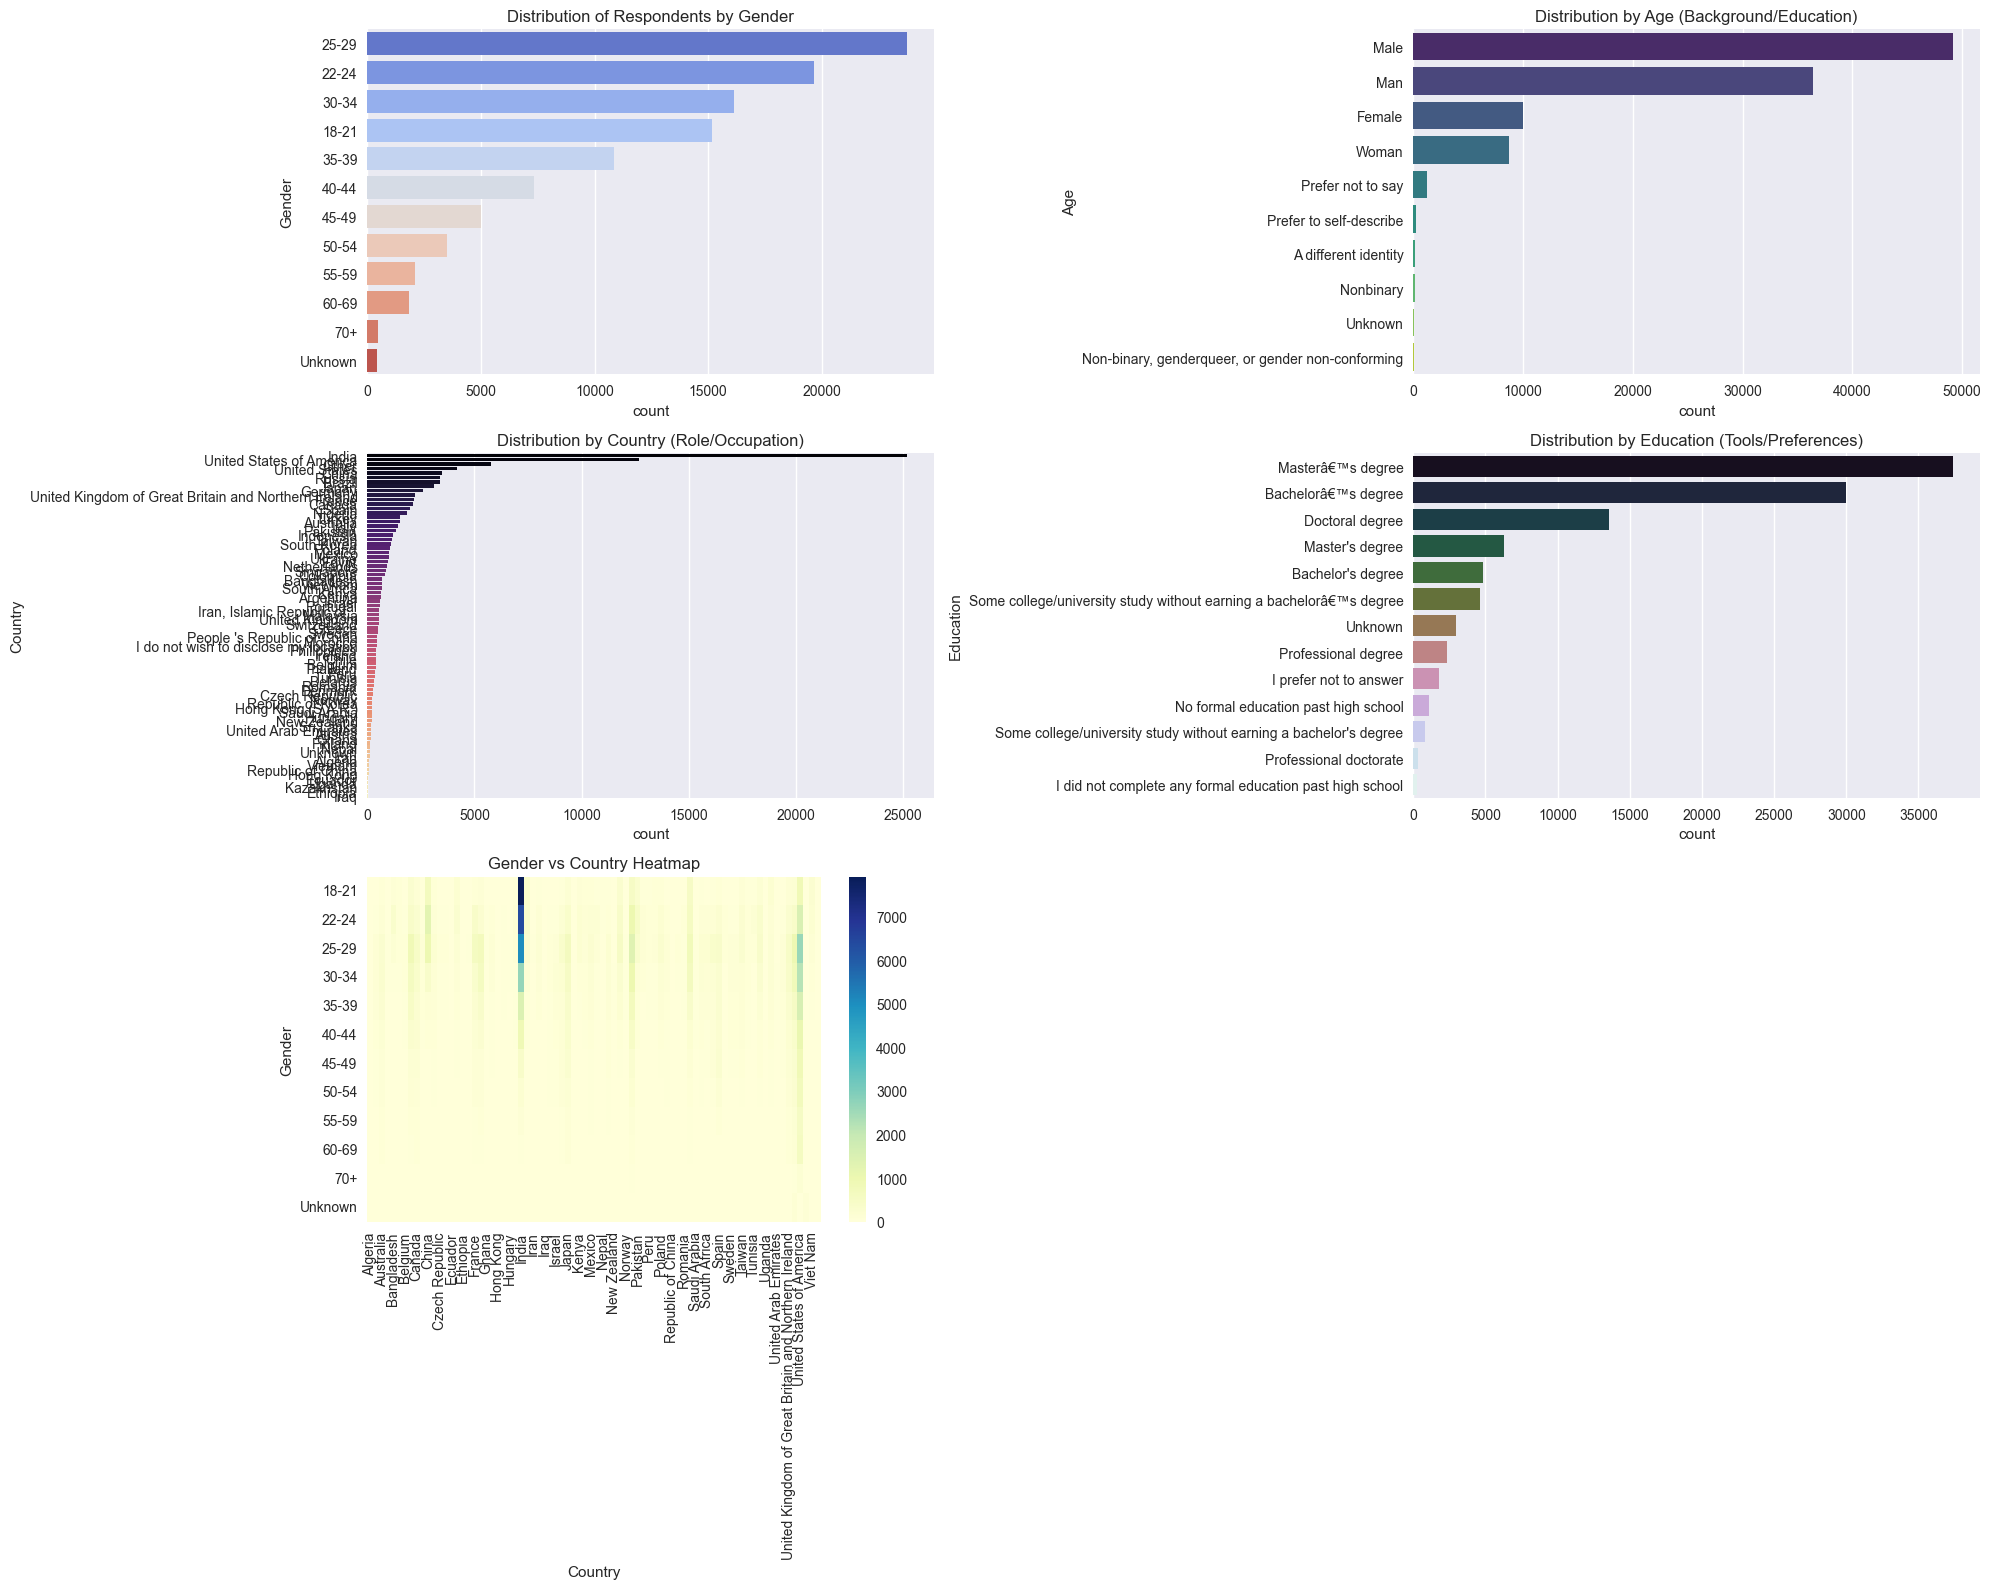

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# 1. Respondent Distribution (Gender)
sns.countplot(data=df, y="Gender", order=df["Gender"].value_counts().index,
              palette="coolwarm", ax=axes[0,0])
axes[0,0].set_title("Distribution of Respondents by Gender")

# 2. Education/Background (Age)
sns.countplot(data=df, y="Age", order=df["Age"].value_counts().index,
              palette="viridis", ax=axes[0,1])
axes[0,1].set_title("Distribution by Age (Background/Education)")

# 3. Occupation/Role (Country)
sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index,
              palette="magma", ax=axes[1,0])
axes[1,0].set_title("Distribution by Country (Role/Occupation)")

# 4. Tools/Preferences (Education)
sns.countplot(data=df, y="Education", order=df["Education"].value_counts().index,
              palette="cubehelix", ax=axes[1,1])
axes[1,1].set_title("Distribution by Education (Tools/Preferences)")

# 5. Heatmap (Gender vs Country)
cross_tab = pd.crosstab(df["Gender"], df["Country"])
sns.heatmap(cross_tab, cmap="YlGnBu", ax=axes[2,0], cbar=True)
axes[2,0].set_title("Gender vs Country Heatmap")

# Hide the last empty subplot
axes[2,1].axis("off")

plt.tight_layout()
plt.show()
